gen:0 evo,best dist :533.2937935702124


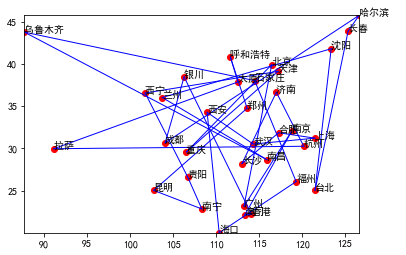

gen:1 evo,best dist :444.95491936690075
gen:2 evo,best dist :440.78222228415405
gen:3 evo,best dist :436.2180506985733
gen:4 evo,best dist :400.91424067081664
gen:5 evo,best dist :386.43098353786604
gen:6 evo,best dist :378.9450131198322
gen:7 evo,best dist :365.8527954524858
gen:8 evo,best dist :355.1592645472719
gen:9 evo,best dist :340.69870377053275
gen:10 evo,best dist :335.55657707895807
gen:11 evo,best dist :335.55657707895807
gen:12 evo,best dist :333.6069173011546
gen:13 evo,best dist :326.3220023095046
gen:14 evo,best dist :323.40561762438807
gen:15 evo,best dist :316.16790376855425
gen:16 evo,best dist :307.79189850664113
gen:17 evo,best dist :302.4105696210362
gen:18 evo,best dist :297.3838496254095
gen:19 evo,best dist :297.22201682765666
gen:20 evo,best dist :292.09693160810406
gen:21 evo,best dist :292.09693160810406
gen:22 evo,best dist :279.2097050458228
gen:23 evo,best dist :279.2097050458228
gen:24 evo,best dist :273.1157875561908
gen:25 evo,best dist :268.7306824821

gen:203 evo,best dist :176.8232366263768
gen:204 evo,best dist :174.9921490548972
gen:205 evo,best dist :174.9921490548972
gen:206 evo,best dist :174.9921490548972
gen:207 evo,best dist :173.6423367815699
gen:208 evo,best dist :173.6423367815699
gen:209 evo,best dist :173.6423367815699
gen:210 evo,best dist :173.6423367815699
gen:211 evo,best dist :173.6423367815699
gen:212 evo,best dist :173.6423367815699
gen:213 evo,best dist :173.6423367815699
gen:214 evo,best dist :173.6423367815699
gen:215 evo,best dist :173.6423367815699
gen:216 evo,best dist :173.6423367815699
gen:217 evo,best dist :173.6423367815699
gen:218 evo,best dist :173.6423367815699
gen:219 evo,best dist :173.6423367815699
gen:220 evo,best dist :173.6423367815699
gen:221 evo,best dist :173.6423367815699
gen:222 evo,best dist :173.6423367815699
gen:223 evo,best dist :173.6423367815699
gen:224 evo,best dist :173.6423367815699
gen:225 evo,best dist :173.6423367815699
gen:226 evo,best dist :173.6423367815699
gen:227 evo,best

gen:404 evo,best dist :173.21681822546287
gen:405 evo,best dist :173.21681822546287
gen:406 evo,best dist :173.21681822546287
gen:407 evo,best dist :173.21681822546287
gen:408 evo,best dist :173.21681822546287
gen:409 evo,best dist :173.21681822546287
gen:410 evo,best dist :173.21681822546287
gen:411 evo,best dist :173.21681822546287
gen:412 evo,best dist :173.21681822546287
gen:413 evo,best dist :173.21681822546287
gen:414 evo,best dist :173.21681822546287
gen:415 evo,best dist :173.21681822546287
gen:416 evo,best dist :173.21681822546287
gen:417 evo,best dist :173.21681822546287
gen:418 evo,best dist :173.21681822546287
gen:419 evo,best dist :173.21681822546287
gen:420 evo,best dist :173.21681822546287
gen:421 evo,best dist :173.21681822546287
gen:422 evo,best dist :173.21681822546287
gen:423 evo,best dist :173.21681822546287
gen:424 evo,best dist :173.21681822546287
gen:425 evo,best dist :173.21681822546287
gen:426 evo,best dist :173.21681822546287
gen:427 evo,best dist :173.2168182

In [4]:
# -*- encoding: utf-8 -*-
import numpy as np
import pandas as pd
# from DW import *

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.animation as animation

class Draw(object):
    bound_x = []
    bound_y = []

    def __init__(self):
        self.fig, self.ax = plt.subplots()
        self.plt = plt
        self.set_font()

    def draw_line(self, p_from, p_to):
        line1 = [(p_from[0], p_from[1]), (p_to[0], p_to[1])]
        (line1_xs, line1_ys) = zip(*line1)
        self.ax.add_line(Line2D(line1_xs, line1_ys, linewidth=1, color='blue'))

    # def draw_arrow(self, p_from, p_to):
    #     if p_from.shape[0] != 2 and p_to.shape[0] != 2:
    #         print('error,', p_from, p_to)
    #         return
    #     p_from = list(p_from)
    #     p_to = list(p_to)
    #     self.ax.arrow(p_from[0], p_from[1], p_to[0] - p_from[0], p_to[1] - p_from[1],
    #                   length_includes_head=True,
    #                   head_width=(self.bound_x[1] - self.bound_x[0]) / 100,
    #                   head_length=(self.bound_x[1] - self.bound_x[0]) / 50,
    #                   fc='blue', ec='black')

    def draw_points(self, pointx, pointy):
        self.ax.plot(pointx, pointy, 'ro')

    def set_xybound(self, x_bd, y_bd):
        self.ax.axis([x_bd[0], x_bd[1], y_bd[0], y_bd[1]])

    def draw_text(self, x, y, text, size=8):
        self.ax.text(x, y, text, fontsize=size)

    def set_font(self, ft_style='SimHei'):
        plt.rcParams['font.sans-serif'] = [ft_style]  # 用来正常显示中文标签
        

class TSP(object):
    citys = np.array([])    #城市数组
    citys_name = np.array([])
    pop_size = 50    #种群大小
    c_rate = 0.7    #交叉率
    m_rate = 0.05    #突变率
    pop = np.array([])    #种群数组
    fitness = np.array([])    #适应度数组
    city_size = -1        #标记城市数目
    ga_num = 200    #最大迭代次数
    best_dist = -1    #记录目前最优距离
    best_gen = []    #记录目前最优旅行方案
    dw = Draw()    #绘图类

    def __init__(self, c_rate, m_rate, pop_size, ga_num):
        self.fitness = np.zeros(self.pop_size)
        self.c_rate = c_rate
        self.m_rate = m_rate
        self.pop_size = pop_size
        self.ga_num = ga_num

    def init(self):
        tsp = self
        # tsp.load_Citys()    #加载城市数据
        tsp.load_Citys2()    #加载城市数据
        tsp.pop = tsp.creat_pop(tsp.pop_size)    #创建种群
        tsp.fitness = tsp.get_fitness(tsp.pop)    #计算初始种群适应度
        tsp.dw.bound_x = [np.min(tsp.citys[:, 0]), np.max(tsp.citys[:, 0])]    #计算绘图时的X界
        tsp.dw.bound_y = [np.min(tsp.citys[:, 1]), np.max(tsp.citys[:, 1])]    #计算绘图时的Y界
        tsp.dw.set_xybound(tsp.dw.bound_x, tsp.dw.bound_y)    #设置边界

    def creat_pop(self, size):
        pop = []
        for i in range(size):
            gene = np.arange(self.citys.shape[0])    #问题的解，基因，种群中的个体：[0，...，city_size]
            np.random.shuffle(gene)        #打乱数组[0，...，city_size]
            pop.append(gene)            #加入种群
        return np.array(pop)

    def get_fitness(self, pop):
        d = np.array([])                #适应度记录数组
        for i in range(pop.shape[0]):
            gen = pop[i]  # 取其中一条基因（编码解，个体）
            dis = self.gen_distance(gen)    #计算此基因优劣（距离长短）
            dis = self.best_dist / dis    #当前最优距离除以当前pop[i]（个体）距离；越近适应度越高，最优适应度为1
            d = np.append(d, dis)  # 保存适应度pop[i]
        return d

    def get_local_fitness(self, gen, i):
        '''
        计算地i个城市的邻域
        交换基因数组中任意两个值组成的解集：称为邻域。计算领域内所有可能的适应度
        :param gen:城市路径
        :param i:第i城市
        :return:第i城市的局部适应度
        '''
        di = 0
        fi = 0
        if i == 0:
            di = self.ct_distance(self.citys[gen[0]], self.citys[gen[-1]])
        else:
            di = self.ct_distance(self.citys[gen[i]], self.citys[gen[i - 1]])
        od = []
        for j in range(self.city_size):
            if i != j:
                od.append(self.ct_distance(self.citys[gen[i]], self.citys[gen[i - 1]]))
        mind = np.min(od)
        fi = di - mind
        return fi

    def EO(self, gen):
        #极值优化，传统遗传算法性能不好，这里混合EO
        #其会在整个基因的领域内，寻找一个最佳变换以更新基因
        local_fitness = []
        for g in range(self.city_size):
            f = self.get_local_fitness(gen, g)
            local_fitness.append(f)
        max_city_i = np.argmax(local_fitness)
        maxgen = np.copy(gen)
        if 1 < max_city_i < self.city_size - 1:
            for j in range(max_city_i):
                maxgen = np.copy(gen)
                jj = max_city_i
                while jj < self.city_size:
                    gen1 = self.exechange_gen(maxgen, j, jj)
                    d = self.gen_distance(maxgen)
                    d1 = self.gen_distance(gen1)
                    if d > d1:
                        maxgen = gen1[:]
                    jj += 1
        gen = maxgen
        return gen

    def select_pop(self, pop):
        #选择种群，优胜劣汰，策略1：低于平均的要替换改变
        best_f_index = np.argmax(self.fitness)
        av = np.median(self.fitness, axis=0)
        for i in range(self.pop_size):
            if i != best_f_index and self.fitness[i] < av:
                pi = self.cross(pop[best_f_index], pop[i])
                pi = self.mutate(pi)
                # d1 = self.distance(pi)
                # d2 = self.distance(pop[i])
                # if d1 < d2:
                pop[i, :] = pi[:]

        return pop

    def select_pop2(self, pop):
        #选择种群，优胜劣汰，策略2：轮盘赌，适应度低的替换的概率大
        probility = self.fitness / self.fitness.sum()
        idx = np.random.choice(np.arange(self.pop_size), size=self.pop_size, replace=True, p=probility)
        n_pop = pop[idx, :]
        return n_pop

    def cross(self, parent1, parent2):
        """交叉p1,p2的部分基因片段"""
        if np.random.rand() > self.c_rate:
            return parent1
        index1 = np.random.randint(0, self.city_size - 1)
        index2 = np.random.randint(index1, self.city_size - 1)
        tempGene = parent2[index1:index2]  # 交叉的基因片段
        newGene = []
        p1len = 0
        for g in parent1:
            if p1len == index1:
                newGene.extend(tempGene)  # 插入基因片段
            if g not in tempGene:
                newGene.append(g)
            p1len += 1
        newGene = np.array(newGene)

        if newGene.shape[0] != self.city_size:
            print('c error')
            return self.creat_pop(1)
            # return parent1
        return newGene

    def mutate(self, gene):
        """突变"""
        if np.random.rand() > self.m_rate:
            return gene
        index1 = np.random.randint(0, self.city_size - 1)
        index2 = np.random.randint(index1, self.city_size - 1)
        newGene = self.reverse_gen(gene, index1, index2)
        if newGene.shape[0] != self.city_size:
            print('m error')
            return self.creat_pop(1)
        return newGene

    def reverse_gen(self, gen, i, j):
        #函数：翻转基因中i到j之间的基因片段
        if i >= j:
            return gen
        if j > self.city_size - 1:
            return gen
        parent1 = np.copy(gen)
        tempGene = parent1[i:j]
        newGene = []
        p1len = 0
        for g in parent1:
            if p1len == i:
                newGene.extend(tempGene[::-1])  # 插入基因片段
            if g not in tempGene:
                newGene.append(g)
            p1len += 1
        return np.array(newGene)

    def exechange_gen(self, gen, i, j):
        #函数：交换基因中i,j值
        c = gen[j]
        gen[j] = gen[i]
        gen[i] = c
        return gen

    def evolution(self):
        #主程序：迭代进化种群
        tsp = self
        for i in range(self.ga_num):
            best_f_index = np.argmax(tsp.fitness)
            worst_f_index = np.argmin(tsp.fitness)
            local_best_gen = tsp.pop[best_f_index]
            local_best_dist = tsp.gen_distance(local_best_gen)
            if i == 0:
                tsp.best_gen = local_best_gen
                tsp.best_dist = tsp.gen_distance(local_best_gen)

            if local_best_dist < tsp.best_dist:
                tsp.best_dist = local_best_dist    #记录最优值
                tsp.best_gen = local_best_gen    #记录最个体基因
                #绘图
                tsp.dw.ax.cla()
                tsp.re_draw()
                tsp.dw.plt.pause(0.001)
            else:
                tsp.pop[worst_f_index] = self.best_gen
            print('gen:%d evo,best dist :%s' % (i, self.best_dist))
    
            tsp.pop = tsp.select_pop(tsp.pop)    #选择淘汰种群
            tsp.fitness = tsp.get_fitness(tsp.pop)    #计算种群适应度
            for j in range(self.pop_size):
                r = np.random.randint(0, self.pop_size - 1)
                if j != r:
                    tsp.pop[j] = tsp.cross(tsp.pop[j], tsp.pop[r])    #交叉种群中第j,r个体的基因
                    tsp.pop[j] = tsp.mutate(tsp.pop[j])    #突变种群中第j个体的基因
            self.best_gen = self.EO(self.best_gen)    #极值优化，防止收敛局部最优
            tsp.best_dist = tsp.gen_distance(self.best_gen)    #记录最优值

    def load_Citys(self, file='china_main_citys.csv', delm=','):
        # 中国34城市经纬度
        data = pd.read_csv(file, delimiter=delm, header=None).values
        #china_main_citys.csv数据太大，只计算部分如：湖南省关键字的
        self.citys = data[data[:, 0] == '湖南省', 4:]
        self.citys_name = data[data[:, 0] == '湖南省', 2]
        self.city_size = self.citys.shape[0]

    def load_Citys2(self, file='china.csv', delm=';'):
        # 中国34城市经纬度
        data = pd.read_csv(file, delimiter=delm, header=None).values
        self.citys = data[:, 1:]
        self.citys_name = data[:, 0]
        self.city_size = data.shape[0]

    def gen_distance(self, gen):
        #计算基因所代表的总旅行距离
        distance = 0.0
        for i in range(-1, len(self.citys) - 1):
            index1, index2 = gen[i], gen[i + 1]
            city1, city2 = self.citys[index1], self.citys[index2]
            distance += np.sqrt((city1[0] - city2[0]) ** 2 + (city1[1] - city2[1]) ** 2)
        return distance

    def ct_distance(self, city1, city2):
        #计算2城市之间的欧氏距离
        d = np.sqrt((city1[0] - city2[0]) ** 2 + (city1[1] - city2[1]) ** 2)
        return d

    def draw_citys_way(self, gen):
        '''
        根据一条基因gen绘制一条旅行路线
        :param gen:
        :return:
        '''
        tsp = self
        dw = self.dw
        m = gen.shape[0]
        tsp.dw.set_xybound(tsp.dw.bound_x, tsp.dw.bound_y)
        for i in range(m):
            if i < m - 1:
                best_i = tsp.best_gen[i]
                next_best_i = tsp.best_gen[i + 1]
                best_icity = tsp.citys[best_i]
                next_best_icity = tsp.citys[next_best_i]
                dw.draw_line(best_icity, next_best_icity)
        start = tsp.citys[tsp.best_gen[0]]
        end = tsp.citys[tsp.best_gen[-1]]
        dw.draw_line(end, start)

    def draw_citys_name(self, gen, size=5):
        '''
        根据一条基因gen绘制对应城市名称
        :param gen:
        :param size: text size
        :return:
        '''
        tsp = self
        m = gen.shape[0]
        tsp.dw.set_xybound(tsp.dw.bound_x, tsp.dw.bound_y)
        for i in range(m):
            c = gen[i]
            best_icity = tsp.citys[c]
            tsp.dw.draw_text(best_icity[0], best_icity[1], tsp.citys_name[c], 10)

    def re_draw(self):
        #重绘图；每次迭代后绘制一次，动态展示。
        tsp = self
        tsp.dw.draw_points(tsp.citys[:, 0], tsp.citys[:, 1])
        tsp.draw_citys_name(tsp.pop[0], 8)
        tsp.draw_citys_way(self.best_gen)
        
def main():
    tsp = TSP(0.5, 0.1, 100, 500)
    tsp.init()
    tsp.evolution()
    tsp.re_draw()
    tsp.dw.plt.show()

if __name__ == '__main__':
    main()